<a href="https://colab.research.google.com/github/Crayfi/Datasets/blob/main/Deep_Evolution_Agent_buy_long.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install bayesian-optimization

In [ ]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
import random
from bayes_opt import BayesianOptimization
sns.set()
from pprint import pprint
import json

In [ ]:
def get_state(data, t, n):
    #print(data[0])
    dl = len(data)
    d = t - n + 1
    block = data[d : t + 1] if d >= 0 else -d* [data[0]] + data[0 : t + 1]
    res = []
    for i in range(n - 1):
      res.append(block[i + 1] - block[i])
    return np.array([res])

In [ ]:
file1 = open('NSE-TATAGLOBAL.csv', 'r')
df = pd.read_csv(file1)
close = df.Close.values.tolist()
window_size = 30
skip = 5
l = len(close) - 1
print(close)
df.describe()

[121.55, 120.9, 120.65, 117.6, 118.65, 118.25, 116.6, 116.05, 117.3, 118.3, 116.5, 114.05, 112.1, 112.85, 112.3, 113.9, 112.55, 114.15, 111.25, 110.1, 108.85, 113.05, 111.5, 116.7, 116.45, 117.0, 118.15, 117.75, 117.6, 120.5, 123.0, 122.4, 122.15, 123.15, 127.7, 127.25, 127.8, 125.95, 123.9, 123.25, 122.15, 122.65, 124.55, 122.5, 120.8, 123.55, 125.1, 123.6, 122.85, 121.5, 120.2, 123.5, 124.65, 127.0, 129.3, 133.4, 132.6, 134.25, 131.0, 133.75, 133.05, 129.85, 129.6, 129.75, 129.35, 130.4, 128.55, 128.45, 127.35, 127.25, 128.95, 124.65, 124.55, 125.15, 124.55, 124.3, 125.6, 125.15, 127.4, 131.9, 128.1, 124.85, 124.75, 121.2, 119.6, 120.1, 119.9, 117.2, 116.8, 109.95, 112.45, 112.95, 112.95, 114.75, 115.25, 114.1, 114.95, 115.25, 114.85, 111.5, 110.95, 112.8, 114.1, 114.8, 115.15, 115.45, 115.8, 113.6, 112.4, 112.5, 109.75, 109.55, 109.4, 107.25, 108.1, 111.5, 113.1, 112.3, 111.0, 108.3, 104.25, 101.9, 103.75, 103.25, 104.4, 104.9, 104.75, 104.95, 106.5, 105.65, 106.25, 106.2, 106.35, 9

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [ ]:
class Deep_Evolution_Strategy:

    inputs = None

    def __init__(
        self, weights, reward_function, population_size, sigma, learning_rate
    ):
        self.weights = weights
        self.reward_function = reward_function
        self.population_size = population_size
        self.sigma = sigma
        self.learning_rate = learning_rate

    def _get_weight_from_population(self, weights, population):
        weights_population = []
        for index, i in enumerate(population):
            jittered = self.sigma * i
            weights_population.append(weights[index] + jittered)
        return weights_population

    def get_weights(self):
        return self.weights_population

    def train(self, epoch = 100, print_every = 1):
        lasttime = time.time()
        for i in range(epoch):
            population = []
            rewards = np.zeros(self.population_size)
            for k in range(self.population_size):
                x = []
                for w in self.weights:
                    x.append(np.random.randn(*w.shape))
                population.append(x)
            for k in range(self.population_size):
                weights_population = self._get_weight_from_population(
                    self.weights, population[k]
                )
                rewards[k] = self.reward_function(weights_population)
            rewards = (rewards - np.mean(rewards)) / (np.std(rewards) + 1e-7)
            for index, w in enumerate(self.weights):
                A = np.array([p[index] for p in population])
                self.weights[index] = (
                    w
                    + self.learning_rate
                    / (self.population_size * self.sigma)
                    * np.dot(A.T, rewards).T
                )
            if (i + 1) % print_every == 0:
                print(
                    'iter %d. reward: %f'
                    % (i + 1, self.reward_function(self.weights))
                )
        print('time taken to train:', time.time() - lasttime, 'seconds')

class Model:
    def __init__(self, input_size, layer_size, output_size):
        self.weights = [
            np.random.randn(input_size, layer_size),
            np.random.randn(layer_size, output_size),
            np.random.randn(layer_size, 1),
            np.random.randn(1, layer_size),
        ]

    def predict(self, inputs):
        #print(inputs)
        feed = np.dot(inputs, self.weights[0]) + self.weights[-1]
        decision = np.dot(feed, self.weights[1])
        buy = np.dot(feed, self.weights[2])
        #print(self.weights[2])
        return decision, buy

    def get_weights(self):
        return self.weights

    def set_weights(self, weights):
        self.weights = weights

In [ ]:
import math
class Agent:
    def __init__(
        self,
        population_size,
        sigma,
        learning_rate,
        model,
        money,
        max_buy,
        max_sell,
        skip,
        window_size,
    ):
        self.window_size = window_size
        self.skip = skip
        self.POPULATION_SIZE = population_size
        self.SIGMA = sigma
        self.LEARNING_RATE = learning_rate
        self.model = model
        self.initial_money = money
        self.max_buy = max_buy
        self.max_sell = max_sell
        self.es = Deep_Evolution_Strategy(
            self.model.get_weights(),
            self.get_reward,
            self.POPULATION_SIZE,
            self.SIGMA,
            self.LEARNING_RATE,
        )

    def act(self, sequence):
        decision, buy = self.model.predict(np.array(sequence))
        
        if math.isnan(buy[0][0]):
          return np.argmax(decision[0]), 0
        return np.argmax(decision[0]), np.int(round(buy[0][0]))

    def get_reward(self, weights):
        initial_money = self.initial_money
        starting_money = initial_money
        self.model.weights = weights
        #print(close)
        state = get_state(close, 0, self.window_size + 1)
        inventory = []
        quantity = 0
        for t in range(0, l, self.skip):
            self.max_buy = math.floor(initial_money/close[t])
            action, buy = self.act(state)
            next_state = get_state(close, t + 1, self.window_size + 1)
            if action == 1 and initial_money >= close[t]:
                if buy < 0:
                    buy = 1
                if buy > self.max_buy:
                    buy_units = self.max_buy
                else:
                    buy_units = buy
                total_buy = buy_units * close[t]
                initial_money -= total_buy
                inventory.append(total_buy)
                quantity += buy_units
            elif action == 2 and len(inventory) > 0:
                if quantity > self.max_sell:
                    sell_units = self.max_sell
                else:
                    sell_units = quantity
                quantity -= sell_units
                total_sell = sell_units * close[t]
                initial_money += total_sell

            state = next_state
        return ((initial_money - starting_money) / starting_money) * 100

    def fit(self, iterations, checkpoint):
        self.es.train(iterations, print_every = checkpoint)

    def buy(self):
        initial_money = self.initial_money
        state = get_state(close, 0, self.window_size + 1)
        print(state)
        starting_money = initial_money
        states_sell = []
        states_buy = []
        inventory = []
        quantity = 0
        for t in range(0, (l-self.window_size+1), self.skip):
            self.max_buy = math.floor(initial_money/close[t])
            action, buy = self.act(state)
            next_state = get_state(close, t + 1, self.window_size + 1)
            if action == 1 and initial_money >= close[t]:
                if buy < 0:
                    buy = 1
                if buy > self.max_buy:
                    buy_units = self.max_buy
                else:
                    buy_units = buy
                total_buy = buy_units * close[t]
                initial_money -= total_buy
                inventory.append(total_buy)
                quantity += buy_units
                states_buy.append(t)
                print(
                    'day %d: buy %d units at price %f, total balance %f'
                    % (t, buy_units, total_buy, initial_money)
                )
            elif action == 2 and len(inventory) > 0:
                bought_price = inventory.pop(0)
                if quantity > self.max_sell:
                    sell_units = self.max_sell
                else:
                    sell_units = quantity
                if sell_units < 1:
                    continue
                quantity -= sell_units
                total_sell = sell_units * close[t]
                initial_money += total_sell
                states_sell.append(t)
                try:
                    invest = ((total_sell - bought_price) / bought_price) * 100
                except:
                    invest = 0
                print(
                    'day %d, sell %d units at price %f, investment %f %%, total balance %f,'
                    % (t, sell_units, total_sell, invest, initial_money)
                )
            state = next_state

        invest = ((initial_money - starting_money) / starting_money) * 100
        print(
            '\ntotal gained %f, total investment %f %%'
            % (initial_money - starting_money, invest)
        )
        plt.figure(figsize = (20, 10))
        plt.plot(close, label = 'true close', c = 'g')
        plt.plot(
            close, 'X', label = 'predict buy', markevery = states_buy, c = 'b'
        )
        plt.plot(
            close, 'o', label = 'predict sell', markevery = states_sell, c = 'r'
        )
        plt.legend()
        plt.show()

In [ ]:
def best_agent(
    window_size, skip, population_size, sigma, learning_rate, size_network
):
    model = Model(window_size, size_network, 3)
    agent = Agent(
        population_size,
        sigma,
        learning_rate,
        model,
        10000,
        5,
        10,
        skip,
        window_size,
    )
    agent.fit(10, 1000)
    return agent.es.reward_function(agent.es.weights)

def find_best_agent(
    window_size, skip, population_size, sigma, learning_rate, size_network
):
    global accbest
    param = {
        'window_size': int(np.around(window_size)),
        'skip': int(np.around(skip)),
        'population_size': int(np.around(population_size)),
        'sigma': max(min(sigma, 1), 0.0001),
        'learning_rate': max(min(learning_rate, 0.5), 0.000001),
        'size_network': int(np.around(size_network)),
    }
    print('\nSearch parameters %s' % (param))
    investment = best_agent(**param)
    print('stop after 100 iteration with investment %f' % (investment))
    if investment > accbest:
        costbest = investment
    return investment

In [ ]:
pip install ipykernel --upgrade

     |████████████████████████████████| 122 kB 7.5 MB/s 
     |████████████████████████████████| 786 kB 56.2 MB/s 
     |████████████████████████████████| 368 kB 57.5 MB/s 
  Attempting uninstall: prompt-toolkit
    Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Attempting uninstall: ipython
    Found existing installation: ipython 5.5.0
    Uninstalling ipython-5.5.0:
      Successfully uninstalled ipython-5.5.0
  Attempting uninstall: ipykernel
    Found existing installation: ipykernel 4.10.1
    Uninstalling ipykernel-4.10.1:


In [ ]:
accbest = 0.0
NN_BAYESIAN = BayesianOptimization(
    find_best_agent,
    {
        'window_size': (2, 50),
        'skip': (1, 15),
        'population_size': (1, 50),
        'sigma': (0.01, 0.99),
        'learning_rate': (0.000001, 0.49),
        'size_network': (10, 1000),
    },
)
NN_BAYESIAN.maximize(init_points = 30, n_iter = 50, acq = 'ei', xi = 0.0)

|   iter    |  target   | learni... | popula... |   sigma   | size_n... |   skip    | window... |
-------------------------------------------------------------------------------------------------

Search parameters {'window_size': 12, 'skip': 8, 'population_size': 43, 'sigma': 0.5525869742578949, 'learning_rate': 0.05907098300169866, 'size_network': 706}
time taken to train: 3.9689817428588867 seconds
stop after 100 iteration with investment 17.134500
|  1        |  17.13    |  0.05907  |  42.83    |  0.5526   |  706.5    |  7.749    |  12.32    |

Search parameters {'window_size': 24, 'skip': 8, 'population_size': 36, 'sigma': 0.478308506735797, 'learning_rate': 0.34508223338467253, 'size_network': 791}
time taken to train: 5.88512921333313 seconds
stop after 100 iteration with investment 172.708000
|  2        |  172.7    |  0.3451   |  35.67    |  0.4783   |  791.4    |  8.085    |  24.2     |

Search parameters {'window_size': 27, 'skip': 11, 'population_size': 37, 'sigma': 0.67216

In [ ]:
print(NN_BAYESIAN.res)
def getMax(d):
  max = 0.0
  params ={}
  for s in d:
    if s['target'] > max:
      max = s['target']
      params = s['params']
  return max, params



[{'target': 17.134499999999953, 'params': {'learning_rate': 0.05907098300169866, 'population_size': 42.82671988993428, 'sigma': 0.5525869742578949, 'size_network': 706.4814799592895, 'skip': 7.748760383774426, 'window_size': 12.316754039485}}, {'target': 172.7080000000001, 'params': {'learning_rate': 0.34508223338467253, 'population_size': 35.67302238434939, 'sigma': 0.478308506735797, 'size_network': 791.4117434372839, 'skip': 8.085490868141338, 'window_size': 24.19520819774386}}, {'target': 163.86499999999998, 'params': {'learning_rate': 0.24568707932966202, 'population_size': 37.05089397276212, 'sigma': 0.6721654654304644, 'size_network': 547.681458468679, 'skip': 11.038007081405196, 'window_size': 26.586619738742854}}, {'target': 77.53849999999998, 'params': {'learning_rate': 0.274711068477996, 'population_size': 22.968934340435936, 'sigma': 0.27707755960501773, 'size_network': 106.08411262652898, 'skip': 6.334063461457382, 'window_size': 26.034339965263747}}, {'target': -51.809500

In [ ]:
m, p = getMax(NN_BAYESIAN.res)
print('Best AGENT accuracy value: %f' % m)
print('Best AGENT parameters: ', p)

Best AGENT accuracy value: 259.853500
Best AGENT parameters:  {'learning_rate': 0.40396332734125323, 'population_size': 34.111021266413246, 'sigma': 0.3085112507222634, 'size_network': 565.3711413953163, 'skip': 3.4018405444333926, 'window_size': 31.01514760514732}


In [ ]:
bayes_res = str(p)
bayes_res = json.loads(bayes_res.replace("'", "\""))
bayes_res['window_size'] = int(round(bayes_res['window_size']))
bayes_res['skip'] = int(round(bayes_res['skip']))
bayes_res['population_size'] = int(round(bayes_res['population_size']))
bayes_res['size_network'] = int(round(bayes_res['size_network']))
pprint(bayes_res)

{'learning_rate': 0.40396332734125323,
 'population_size': 34,
 'sigma': 0.3085112507222634,
 'size_network': 565,
 'skip': 3,
 'window_size': 31}


In [ ]:
# this is my parameter
best_agent(30, 1, 15, 0.1, 0.03, 500)

time taken to train: 2.3625802993774414 seconds


20.13260344000004

In [ ]:
# this is from bayesian
best_agent(bayes_res['window_size'], bayes_res['skip'], bayes_res['population_size'], bayes_res['sigma'], bayes_res['learning_rate'], bayes_res['size_network'])

time taken to train: 14.601969480514526 seconds


190.49599999999992

iter 100. reward: -1.668887
iter 200. reward: 6.834413
iter 300. reward: 11.420311
iter 400. reward: 4.916410
iter 500. reward: 17.887315
time taken to train: 114.39712333679199 seconds
day 0: buy 1 units at price 768.700012, total balance 9231.299988
day 1: buy 5 units at price 3810.650025, total balance 5420.649963
day 2: buy 5 units at price 3810.100100, total balance 1610.549863
day 3, sell 5 units at price 3912.600100, investment 408.989208 %, total balance 5523.149963,
day 4, sell 5 units at price 3952.550050, investment 3.723775 %, total balance 9475.700013,
day 7: buy 5 units at price 3770.100100, total balance 5705.599913
day 8: buy 5 units at price 3680.400085, total balance 2025.199828
day 9, sell 5 units at price 3792.449950, investment -0.463246 %, total balance 5817.649778,
day 11: buy 5 units at price 3856.149900, total balance 1961.499878
day 12, sell 5 units at price 3802.699890, investment 0.864693 %, total balance 5764.199768,
day 13, sell 5 units at price 3846.00006

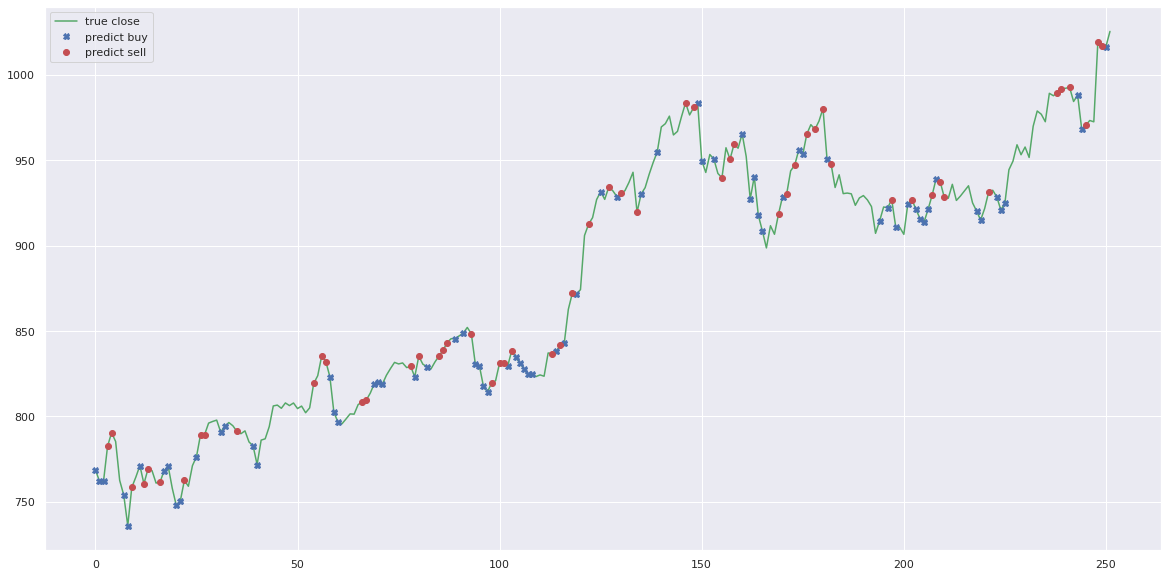

In [ ]:
# this is my parameter
model = Model(30, 500, 3)
agent = Agent(15, 0.1, 0.03, model, 10000, 5, 5, 1, 30)
agent.fit(500, 100)
agent.buy()

iter 100. reward: 1634.780000
iter 200. reward: 2181.075000
iter 300. reward: 2281.680000
iter 400. reward: 2572.425000
iter 500. reward: 2721.085000
time taken to train: 800.5519640445709 seconds
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0.]]
day 6: buy 1 units at price 116.600000, total balance 883.400000
day 9: buy 1 units at price 118.300000, total balance 765.100000
day 15: buy 6 units at price 683.400000, total balance 81.700000
day 33, sell 5 units at price 615.750000, investment 428.087479 %, total balance 697.450000,
day 39: buy 1 units at price 123.250000, total balance 574.200000
day 42: buy 1 units at price 124.550000, total balance 449.650000
day 48: buy 3 units at price 368.550000, total balance 81.100000
day 54, sell 5 units at price 646.500000, investment 446.491970 %, total balance 727.600000,
day 57, sell 3 units at price 402.750000, investment -41.066725 %, total balance 1130.350000,
day 72: buy 1 units at price 124

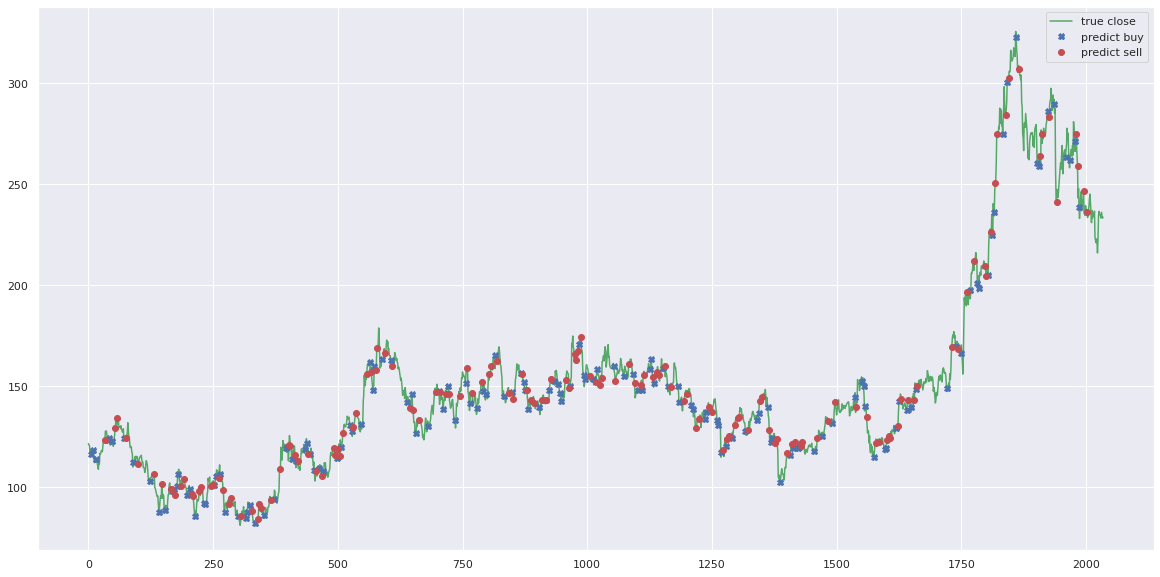

In [ ]:
# this is from bayesian
model = Model(bayes_res['window_size'], bayes_res['size_network'], 3)
agent = Agent(
    bayes_res['population_size'], bayes_res['sigma'], bayes_res['learning_rate'], model, 1000, 5, 5, bayes_res['skip'], bayes_res['window_size']
)
agent.fit(bayes_res['size_network'], 100)
agent.buy()